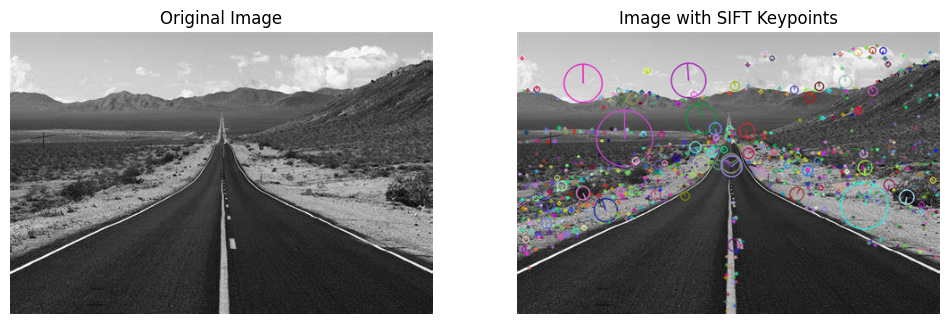

Number of keypoints detected: 760
Descriptor shape: (760, 128)
Keypoint 1: Location=(2.73, 158.67), Scale=1.92, Angle=123.87
Keypoint 2: Location=(2.87, 123.17), Scale=1.83, Angle=267.98
Keypoint 3: Location=(5.17, 192.56), Scale=3.34, Angle=249.31
Keypoint 4: Location=(5.20, 28.99), Scale=3.68, Angle=71.08
Keypoint 5: Location=(5.28, 242.88), Scale=4.16, Angle=261.90
First 5 descriptors:
[[ 18.   7.  14.  31.  84.  16.   5.  20. 140.  45.   5.   8.  21.  20.
   16. 132.  11.   5.   5.  29. 140. 127.  13.  17.  34.  36.   6.   7.
   31.  49.  19.  20.  38.  20.  12.  26.  31.   6.   3.  13. 140.  69.
    2.   5.  21.  24.   8.  70.  38.   3.   0.   1. 140. 140.  14.  10.
   13.   0.   0.   0.  19.  87.  61.  20.  35.   6.   5.  12.  11. 100.
   51.  27. 140.  18.   1.   5.   9.  12.  12. 127.  43.   2.   0.   6.
   72.  65.   3.  13.   0.   0.   0.   0.   9.  24.   2.   0.  12.   3.
    4.   3.  16.  93.  28.   9.  83.   9.   0.   0.   1.  13.   9.  28.
    5.   0.   0.   0.   1.   1. 

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
image = cv2.imread(r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\OIP (2).jpeg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Step 1: Detect key points and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Visualize keypoints
keypoint_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Image with SIFT Keypoints")
plt.imshow(keypoint_image, cmap='gray')
plt.axis('off')

plt.show()

# Step 2: Key point details
print(f"Number of keypoints detected: {len(keypoints)}")
print(f"Descriptor shape: {descriptors.shape}")

# Print the first few keypoints and descriptors
for i, kp in enumerate(keypoints[:5]):
    print(f"Keypoint {i+1}: Location=({kp.pt[0]:.2f}, {kp.pt[1]:.2f}), Scale={kp.size:.2f}, Angle={kp.angle:.2f}")
print("First 5 descriptors:")
print(descriptors[:5])


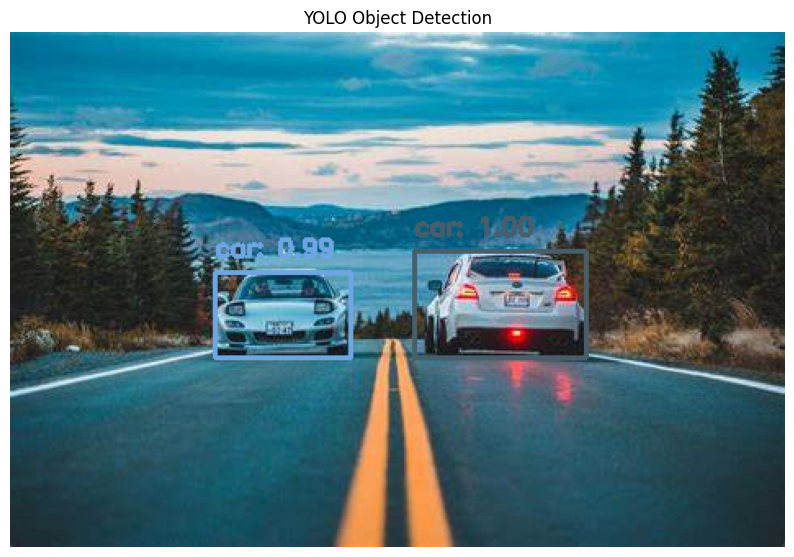

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Download and load YOLO model
# Paths to YOLO configuration and weights files
yolo_cfg = r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\yolov3.cfg'        # Download from YOLO official source
yolo_weights = r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\yolov3.weights'  # Download the pre-trained weights
yolo_classes = r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\coco.names'     # Class labels file

# Load class labels
with open(yolo_classes, 'r') as f:
    classes = f.read().strip().split("\n")

# Load YOLO model
net = cv2.dnn.readNetFromDarknet(yolo_cfg, yolo_weights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Step 2: Load and preprocess the image
image = cv2.imread(r'C:\Users\Dilfina\OneDrive\Desktop\image\sem lab\OIP.jpeg')
height, width = image.shape[:2]

# Create blob from image
blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(416, 416), swapRB=True, crop=False)
net.setInput(blob)

# Get YOLO output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Perform forward pass
layer_outputs = net.forward(output_layers)

# Step 3: Parse YOLO output
boxes, confidences, class_ids = [], [], []
confidence_threshold = 0.5
nms_threshold = 0.4

for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > confidence_threshold:
            # Scale bounding box to original image size
            box = detection[0:4] * np.array([width, height, width, height])
            center_x, center_y, box_width, box_height = box.astype('int')
            x = int(center_x - (box_width / 2))
            y = int(center_y - (box_height / 2))
            
            boxes.append([x, y, int(box_width), int(box_height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply Non-Max Suppression (NMS) to suppress overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, nms_threshold)

# Visualize detections
for i in indices.flatten():
    x, y, w, h = boxes[i]
    label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
    color = np.random.randint(0, 255, size=(3,), dtype=int)
    cv2.rectangle(image, (x, y), (x + w, y + h), color.tolist(), 2)
    cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color.tolist(), 2)

# Step 4: Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("YOLO Object Detection")
plt.show()
